# Analyze zomato restaurant dataset:
<p>Find some answer of question:<br>
<b>
    1. Do more restaurant provide online delivery compare to offline?<br>
    2. Which type of restaurant are most favoured by the general public?<br>
    3. What price range do couple prefer for dining out?
</b></p>

<h1>Importing necessary python libraries.</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>creat dataframe from csv file.</h1>

In [2]:
url = r"C:\Users\ASHRAF\OneDrive\Desktop\all_of_pandas\Zomato-data-.csv"
dataframe = pd.read_csv(url)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<h1>Data Cleaning and Preparation:</h1>

<p>1. Convert the rate column to a float by removing denominator characters.<br>

<b>dataframe['rate']=dataframe['rate'].apply(handleRate):</b> <br>Applies the handleRate function to clean and convert each rating value in the 'rate' column.</p>





In [3]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


<b>check are there any missing value</b><br>
if not found then go further or clean it.

In [4]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None


<h1>Exploring restaurant types:</h1>
1. see the <b>listed_in (type)</b> column to identify popular restaurant categories.

Text(0.5, 0, 'Type of restaurant')

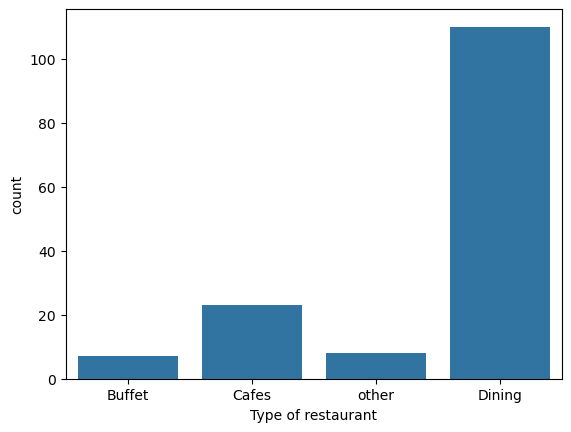

In [6]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type of restaurant')

conclusion: the majority of restaurant fall into dining category.<br>
<br>
2. Votes by the restaurant type:

Text(0, 0.5, 'Votes')

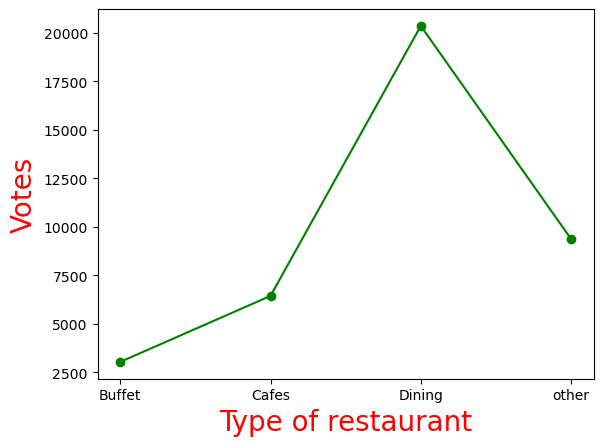

In [7]:
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes":grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of restaurant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

Conclusion: Dining restaurants are preferred by a larger number of individuals.<br><br>
<h1>Identify the most voted restaurant:</h1>

In [10]:
#find the restaurant with the highest number of votes:
max_votes = dataframe["votes"].max()
restaurant_with_max_votes = dataframe.loc[dataframe["votes"]==max_votes,"name"]
print("Restaurant(s) with the maximum votes:\n")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:

38    Empire Restaurant
Name: name, dtype: object


<h1>Online order availability</h1>

<Axes: xlabel='online_order', ylabel='count'>

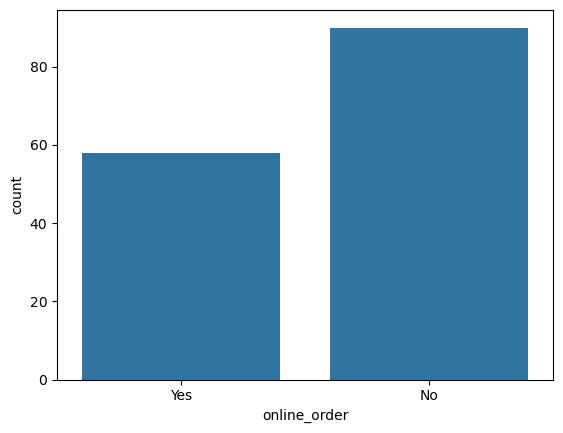

In [11]:
#exploring online_order to find how many restaurant accept online order.
sns.countplot(x=dataframe["online_order"])

conclusion : majority of the restaurant doesn't accept online order.<br>
<br>
<h1>Analyze Rating:</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

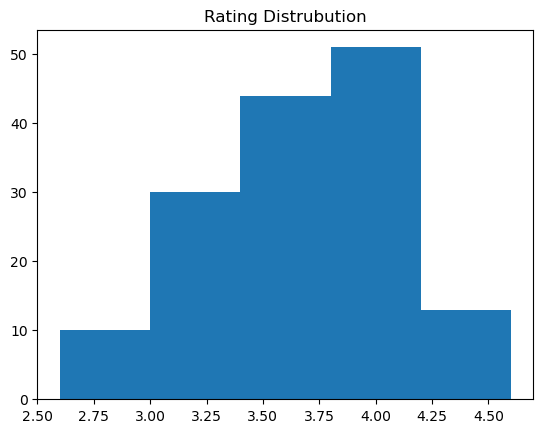

In [12]:
#checking the distribution of rating from the rate column.
plt.hist(dataframe["rate"],bins=5)
plt.title("Rating Distrubution")
plt.show

Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.<br><br>
<h1>Approximate cost for couples:</h1>
Analyze the <b>approx_cost(for two people)</b> column to find the preferred price range.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

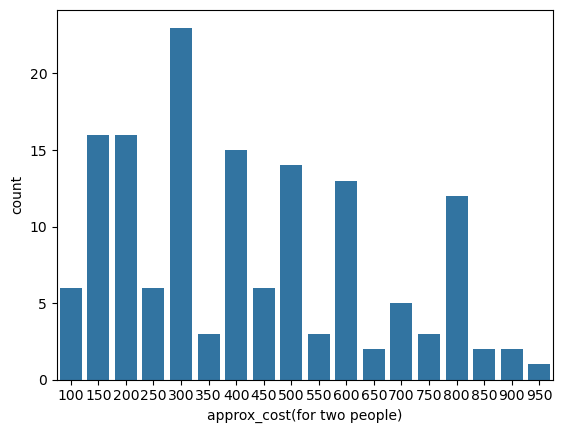

In [14]:
couple_data = dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_data)

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300.<br><br>
<h1>Rating comparison-online vs offline order:</h1>
compare rating between restaurant that accept online order and those don't.

<Axes: xlabel='online_order', ylabel='rate'>

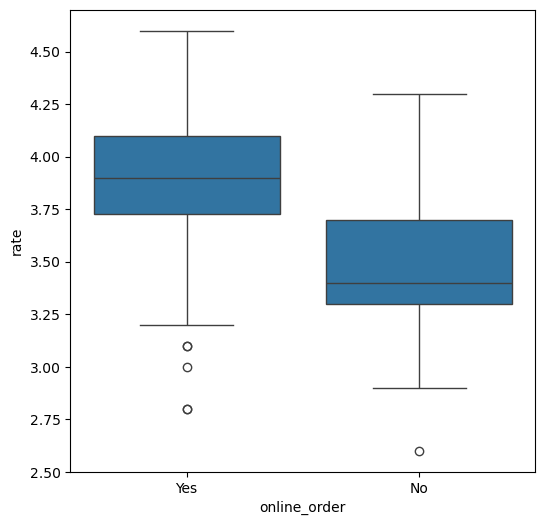

In [15]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=dataframe)

Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.<br><br>
<h1> Order Mode Preferences by Restaurant Type:</h1>
Find the relationship between order <b>mode (online_order)</b> and <b>restaurant type (listed_in(type))</b>.<br>

<b>.pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0):</b><br> Creates a pivot table counting restaurants by type and online order availability.

<function matplotlib.pyplot.show(close=None, block=None)>

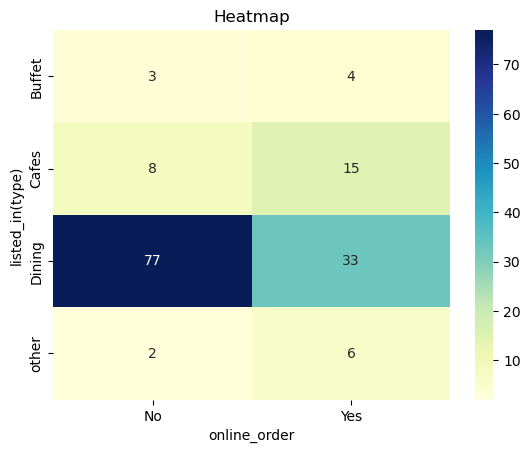

In [16]:
pivot_table = dataframe.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu", fmt="d")
plt.title("Heatmap")
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show

<p>Conclusion: Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.</p>